In [2]:
# LIBRAIRIES IMPORT
# Data
import pandas as pd
import numpy as np
from sklearn.cluster import Birch # Replace with your model

# Visualisation
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
import folium

%matplotlib inline

In [3]:
# DATA IMPORT
uber = pd.read_csv('../data/Uber.csv')
uber.drop(['Unnamed: 0', 'Hour', 'DayOfWeek'], axis = 1, inplace=True)
uber.head()

Date/Time      Lat      Lon    Base  Period  DayType
0  2014-08-01 00:03:00  40.7366 -73.9906  B02512       0        1
1  2014-08-01 00:09:00  40.7260 -73.9918  B02512       0        1
2  2014-08-01 00:12:00  40.7209 -74.0507  B02512       0        1
3  2014-08-01 00:12:00  40.7387 -73.9856  B02512       0        1
4  2014-08-01 00:12:00  40.7323 -74.0077  B02512       0        1

In [4]:
# SAMPLING

# for distance-based clustering
#frac_sample = 0.05

# for non distance-based clustering
frac_sample = 1

uber_sample = uber.sample(frac = frac_sample, random_state=42)

In [7]:
# MODEL FITTING
X = uber_sample[['Lat','Lon']]
model = Birch(threshold = 0.01, n_clusters = 5)
model.fit(X)

Birch(n_clusters=5, threshold=0.01)

In [9]:
# MODEL PREDICTION
X_predict = X.copy()
X_predict['cluster'] = model.predict(X)
X_predict.cluster.value_counts()

4    813914
2      8578
1      3709
0      2586
3       488
Name: cluster, dtype: int64

/var/folders/lc/q1lfsr356d11n9j92x9l_x080000gn/T/ipykernel_50654/2944529026.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


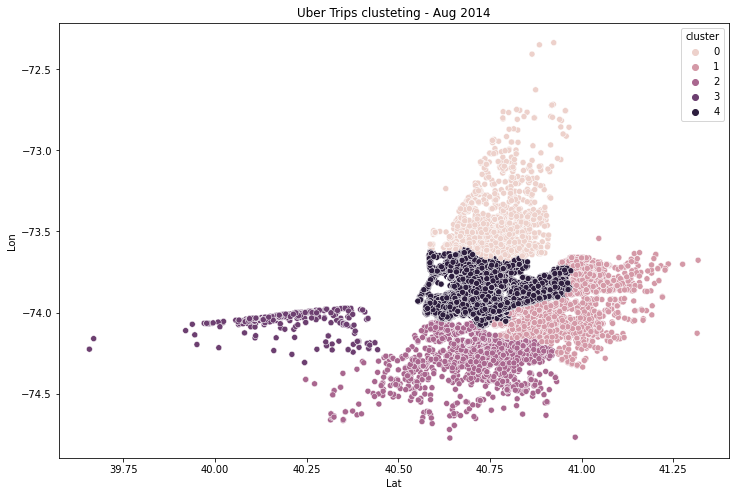

In [12]:
# VISUALISATION

# Seaborn

f,ax = plt.subplots(1,1, figsize=(12,8))
sns.scatterplot(data = X_predict, x='Lat', y='Lon', hue='cluster', ax = ax)
ax.set_title('Uber Trips clusteting - Aug 2014')
f.show()

In [16]:
# Folium

# Initialise map (centered on mean)
map_clusters = folium.Map(location=[uber.Lat.mean(), uber.Lon.mean()],
                zoom_start=9, control_scale=False, zoom_control = False, scrollWheelZoom=False, dragging=False)

# Number of points to show
nb_points = 5000
df_map = X_predict.sample(frac = nb_points/X_predict.shape[0], random_state=42)


# set color scheme for the clusters
x = np.arange(5)
ys = [i + x + (i*x)**2 for i in range(5)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, cluster in zip(df_map['Lat'], df_map['Lon'], df_map['cluster']):
    folium.vector_layers.CircleMarker(
        [lat, lng],
        radius=5,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

In [ ]:
# Better be in Manhattan